In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/08-Correlation%20Matrices/weekly_df.csv')
df.head()

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,...,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,...,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,...,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,...,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,...,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,...,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74


In [10]:
skill_positions = ['QB', 'RB', 'WR', 'TE']
df_skill = df.loc[df['Position'].isin(skill_positions)]
print(df_skill['Position'].unique())
df.head()

['QB' 'TE' 'WR' 'RB']


,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,...,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,...,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,...,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,...,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,...,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,...,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74


In [13]:
import numpy as np

cols = ['Player', 'Tm', 'Position', 'Week', 'PPRFantasyPoints']
new_df = df_skill[cols]
new_df.head()

,Player,Tm,Position,Week,PPRFantasyPoints
0,Tom Brady,TB,QB,1,10.38
1,Tom Brady,TB,QB,2,9.40
2,Tom Brady,TB,QB,3,14.74
3,Tom Brady,TB,QB,4,25.40
4,Tom Brady,TB,QB,5,19.74


In [15]:
new_df = new_df.groupby(['Player', 'Tm', 'Position'], as_index=False).agg({
    'PPRFantasyPoints': np.mean
})

new_df

,Player,Tm,Position,PPRFantasyPoints
0,A.J. Brown,PHI,WR,16.660000
1,A.J. Dillon,GB,RB,9.858824
2,A.J. Green,ARI,WR,4.738462
3,Aaron Jones,GB,RB,14.623529
4,Aaron Rodgers,GB,QB,14.070588
...,...,...,...,...
597,Zack Moss,IND,RB,5.962500
598,Zamir White,LV,RB,0.636364
599,Zander Horvath,LAC,RB,2.325000
600,Zay Jones,JAX,WR,12.933333


In [26]:
position_map = {
    'QB': 1,
    'RB': 2,
    'WR': 3,
    'TE': 2
}

# go team by team, find the nth player for ex wr 2, this doesnt update the player name, but just the ppr score value
def get_top_n_player_at_pos(df, pos, n):
  df = df.loc[df['Position'] == pos]

  return df.groupby('Tm', as_index=True).apply(
      lambda x: x.nlargest(n, ['PPRFantasyPoints']).min()
  )

get_top_n_player_at_pos(new_df, 'WR', 2)

,Player,Tm,Position,PPRFantasyPoints
Tm,,,,
ARI,DeAndre Hopkins,ARI,WR,13.000000
ATL,Drake London,ATL,WR,6.875000
BAL,Devin Duvernay,BAL,WR,8.292857
BUF,Gabe Davis,BUF,WR,11.782353
CAR,D.J. Moore,CAR,WR,7.520000
CHI,Dante Pettis,CHI,WR,4.657143
CIN,Ja'Marr Chase,CIN,WR,15.100000
CLE,Amari Cooper,CLE,WR,9.829412
DAL,CeeDee Lamb,DAL,WR,7.562500


In [27]:
new_df.loc[(new_df['Position'] == 'WR') & (new_df['Tm'] == 'ARI')].sort_values(by='PPRFantasyPoints', ascending=False)

,Player,Tm,Position,PPRFantasyPoints
159,DeAndre Hopkins,ARI,WR,16.855556
396,Marquise Brown,ARI,WR,13.000000
490,Rondale Moore,ARI,WR,10.987500
219,Greg Dortch,ARI,WR,10.463636
2,A.J. Green,ARI,WR,4.738462
18,Andre Baccellia,ARI,WR,2.300000
484,Robby Anderson,ARI,WR,2.085714
21,Andy Isabella,ARI,WR,2.050000
461,Pharoh Cooper,ARI,WR,2.050000


In [29]:
corr_df = pd.DataFrame(columns = cols)

for pos,n in position_map.items():
  for n in range(1, n+1):
    pos_df = get_top_n_player_at_pos(new_df, pos, n)
    pos_df = pos_df.rename({'PPRFantasyPoints': f'{pos}{n}'}, axis=1)
    corr_df = pd.concat([corr_df, pos_df], axis=1)

corr_df = corr_df.dropna(axis=1)
corr_df = corr_df.drop(['Position', 'Player', 'Tm'], axis=1)
corr_df.head(32)

,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
ARI,18.229091,15.400000,9.588889,16.855556,13.000000,10.987500,11.560000,6.833333
ATL,15.120000,11.900000,9.962500,10.505882,6.875000,4.577778,7.560000,5.500000
BAL,19.673333,11.300000,8.675000,8.916667,8.292857,6.864706,12.675000,8.900000
BUF,24.155556,10.772222,6.494444,19.027778,11.782353,8.100000,9.305882,3.025000
CAR,14.386667,19.666667,8.187500,11.711765,7.520000,6.384615,3.885714,3.130769
CHI,19.732000,11.106250,9.061538,9.227273,4.657143,4.437500,8.664706,1.650000
CIN,21.396842,16.164706,8.705263,19.780000,15.100000,9.580000,8.531250,3.709091
CLE,14.263333,16.552941,7.458824,14.470588,9.829412,4.500000,10.142857,4.407143
DAL,17.545714,14.777778,11.511765,17.931579,7.562500,7.200000,10.876471,4.400000
DEN,15.050667,11.725000,10.500000,13.613333,10.626667,5.127273,8.610000,4.250000


In [30]:
corr_df.corr()

,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
QB1,1.000000,-0.250328,-0.004958,0.152073,0.350165,0.029999,0.419420,-0.175894
RB1,-0.250328,1.000000,-0.247615,-0.079574,0.017388,0.099125,-0.127167,0.230554
RB2,-0.004958,-0.247615,1.000000,-0.011002,0.081476,-0.162328,0.081667,0.074629
WR1,0.152073,-0.079574,-0.011002,1.000000,0.434057,0.282885,0.149520,-0.054162
WR2,0.350165,0.017388,0.081476,0.434057,1.000000,0.352227,0.063123,0.038886
WR3,0.029999,0.099125,-0.162328,0.282885,0.352227,1.000000,0.063246,0.269139
TE1,0.419420,-0.127167,0.081667,0.149520,0.063123,0.063246,1.000000,0.173738
TE2,-0.175894,0.230554,0.074629,-0.054162,0.038886,0.269139,0.173738,1.000000


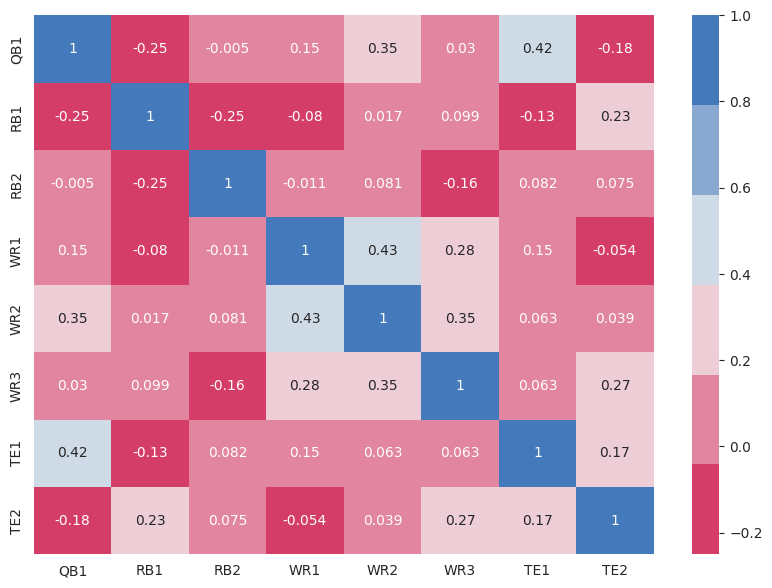

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.heatmap(
    corr_df.corr(), annot=True, cmap=sns.diverging_palette(0,250)
);